In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Plot 1 : Gaussian kernel')

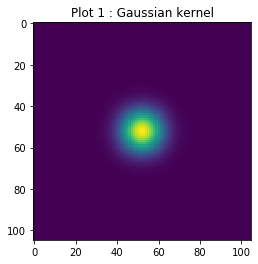

In [29]:
gauss = cv2.getGaussianKernel(105,7)
gaussker = gauss*(gauss.T)
plt.imshow(gaussker)
plt.title("Plot 1 : Gaussian kernel")

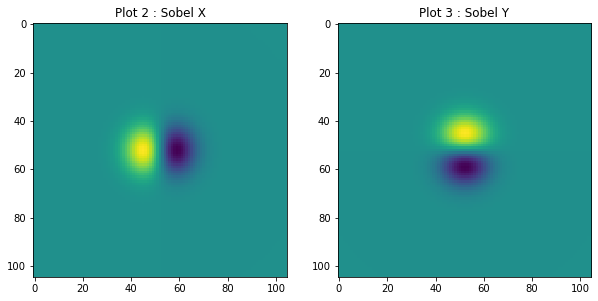

In [36]:
sobelx = cv2.Sobel(gaussker,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gaussker,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Plot 2 : Sobel X")
plt.imshow(sobelx)
plt.subplot(122)
plt.title("Plot 3 : Sobel Y")
plt.imshow(sobely)

Text(0.5, 1.0, 'Plot 5 : Laplacian Y')

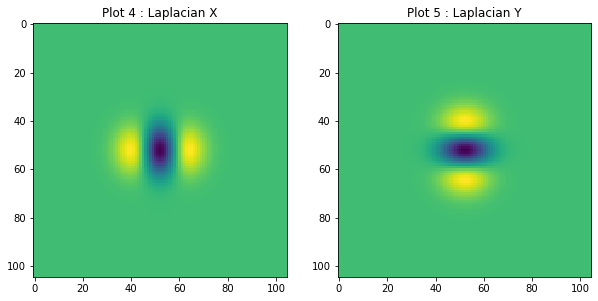

In [32]:
laplacianx = cv2.Sobel(sobelx,cv2.CV_64F,1,0,ksize=5)
laplaciany = cv2.Sobel(sobely,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(laplacianx)
plt.title("Plot 4 : Laplacian X")
plt.subplot(122)
plt.imshow(laplaciany)
plt.title("Plot 5 : Laplacian Y")

Text(0.5, 1.0, 'Plot 6 : Laplacian kernel')

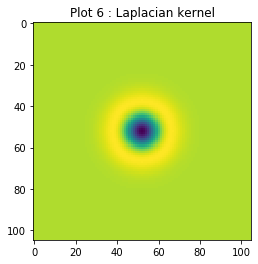

In [33]:
laplacian = laplacianx + laplaciany
plt.imshow(laplacian)
plt.title("Plot 6 : Laplacian kernel")

In [37]:
def Laplace(kersize,sigma):
    gauss = cv2.getGaussianKernel(kersize,sigma)
    gaussker = gauss*(gauss.T)
    sobelx = cv2.Sobel(gaussker,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(gaussker,cv2.CV_64F,0,1,ksize=5)
    laplacianx = cv2.Sobel(sobelx,cv2.CV_64F,1,0,ksize=5)
    laplaciany = cv2.Sobel(sobely,cv2.CV_64F,0,1,ksize=5)
    laplacian = laplacianx + laplaciany
    return(laplacian)

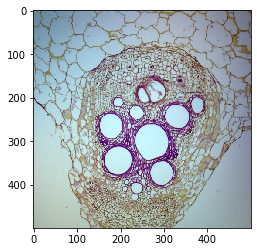

In [39]:
img = cv2.imread('a.jpg')
plt.imshow(img)

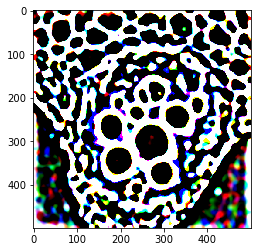

In [59]:
afil = cv2.filter2D(img,-1,Laplace(200,7))
plt.imshow(afil)

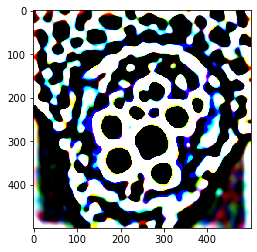

In [55]:
afil2 = cv2.filter2D(img,-1,Laplace(200,10))
plt.imshow(afil2)

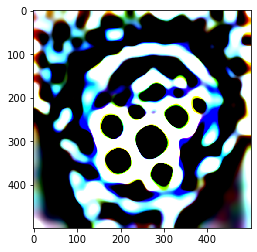

In [56]:
afil3 = cv2.filter2D(img,-1,Laplace(200,15))
plt.imshow(afil3)

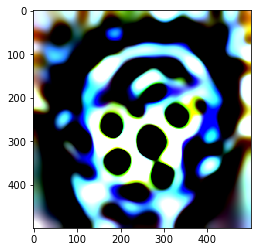

In [57]:
afil4 = cv2.filter2D(img,-1,Laplace(200,20))
plt.imshow(afil4)

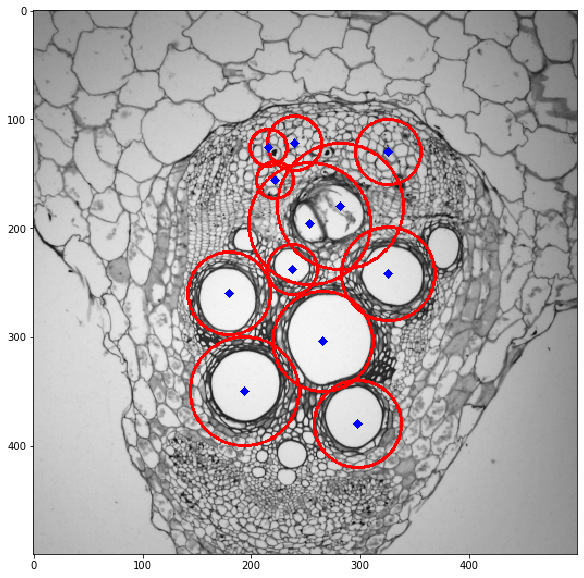

In [128]:
plt.figure(figsize=(10,10))
img2 = cv2.imread('a.jpg',0)
cimg = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img2,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=60,minRadius=0,maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    
plt.imshow(cimg)